# import modules

In [1]:
import pandas as pd
from Bio import SeqIO
from Bio import Entrez
from Bio.Blast import NCBIXML
from Bio.Blast import NCBIWWW
from Bio import ExPASy
import biomart 
import swan_vis as swan
import cv2
from IPython.display import display, Image
import pandas as pd
%matplotlib inline
import swan_vis as swan

In [2]:
## Load graph
# load up a saved SwanGraph from a pickle file
sg = swan.read('/data/Phillippy/projects/HG002_Masseq/06.pantranscriptome/07.hg002v1.0.1/swanv2.p.p')

Read in graph from /data/Phillippy/projects/HG002_Masseq/06.pantranscriptome/07.hg002v1.0.1/swanv2.p.p


In [3]:
import os

os.getcwd()
os.chdir('/data/Phillippy/projects/HG002_Masseq/06.pantranscriptome/07.hg002v1.0.1/')

## Plot

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib notebook
%matplotlib widget
%matplotlib inline

In [5]:
rpvg_gene_max = pd.read_csv('/data/Phillippy/projects/HG002_Masseq/06.pantranscriptome/07.hg002v1.0.1/05.quantification/hg002v101.allGene.isoquantModel.rpvg_joint.max.txt',
          sep='\t')
rpvg_gene_max

,Name_1,Name_2,ClusterID,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,trans,gene,geneName,max,Minimum_TPM
0,TCONS_00020747_R1,TCONS_00020747_H1,20,1.0,0.000000,0.000000,0.00000,0.000000,TCONS_00020747,XLOC_005166,WASHC2A,T,0.000000
1,transcript12583.chr10.nic_R1,transcript12583.chr10.nic_H1,20,1.0,400.482380,50.293997,233.34355,29.312355,transcript12583.chr10.nic,XLOC_005166,WASHC2A,T,29.312355
2,TCONS_00020735_R1,TCONS_00020735_H1,20,1.0,14.922362,6.534654,0.00000,0.000000,TCONS_00020735,XLOC_005166,WASHC2A,T,0.000000
3,TCONS_00020751_R1,TCONS_00020751_H1,20,1.0,0.000000,0.000000,0.00000,0.000000,TCONS_00020751,XLOC_005166,WASHC2A,T,0.000000
4,TCONS_00020739_R1,TCONS_00020739_H1,20,1.0,0.000000,0.000000,0.00000,0.000000,TCONS_00020739,XLOC_005166,WASHC2A,T,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6464,TCONS_00037843_H1,TCONS_00037843_H1,2468,1.0,0.000000,0.000000,0.00000,0.000000,TCONS_00037843,XLOC_009201,MSANTD2,T,0.000000
6465,TCONS_00037841_H1,TCONS_00037841_H1,2468,1.0,0.000000,0.000000,0.00000,0.000000,TCONS_00037841,XLOC_009201,MSANTD2,T,0.000000
6466,TCONS_00037838_H1,TCONS_00037838_H1,2468,1.0,0.000000,0.000000,0.00000,0.000000,TCONS_00037838,XLOC_009201,MSANTD2,T,0.000000
6467,TCONS_00037840_H1,TCONS_00037840_H1,2468,1.0,0.000000,0.000000,0.00000,0.000000,TCONS_00037840,XLOC_009201,MSANTD2,T,0.000000


In [203]:
gene_to_plt = 'ESYT2'
by_transcript = rpvg_gene_max[rpvg_gene_max['geneName'] == gene_to_plt]
by_transcript.index = by_transcript.trans
by_transcript

,Name_1,Name_2,ClusterID,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,trans,gene,geneName,max,Minimum_TPM
trans,,,,,,,,,,,,,
TCONS_00175870,TCONS_00175870_H1,TCONS_00175870_H2,635,0.998126,0.000000,0.000000,0.000000,0.000000,TCONS_00175870,XLOC_042963,ESYT2,T,0.000000
TCONS_00175871,TCONS_00175871_H1,TCONS_00175871_H2,635,0.998126,2.915934,0.366916,25.031593,4.812809,TCONS_00175871,XLOC_042963,ESYT2,T,0.366916


In [204]:
list(by_transcript.index)

['TCONS_00175870', 'TCONS_00175871']

In [205]:
by_transcript['log_totalExp']  = np.log10(by_transcript['TPM_1'] + by_transcript['TPM_2']+1)
by_transcript = by_transcript.sort_values(by = "log_totalExp", ascending=True)
by_transcript_totalExp = by_transcript[['log_totalExp']]
by_transcript_totalExp.index = by_transcript['trans']
by_transcript_totalExp

,log_totalExp
trans,
TCONS_00175870,0.000000
TCONS_00175871,0.790969


In [206]:
totalMAX=max(by_transcript_totalExp['log_totalExp'])+0.1

In [207]:
by_transcript['TPM_1_prob']  = by_transcript['TPM_1'] / (by_transcript['TPM_1'] + by_transcript['TPM_2'] ) * 100
by_transcript['TPM_2_prob']  = by_transcript['TPM_2'] / (by_transcript['TPM_1'] + by_transcript['TPM_2'] ) * 100
by_transcript_prob = by_transcript[['TPM_1_prob','TPM_2_prob']]

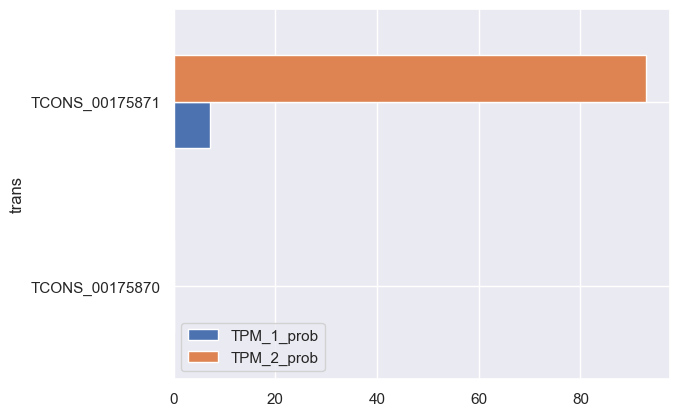

In [208]:
ax1 = by_transcript_prob.plot.barh()

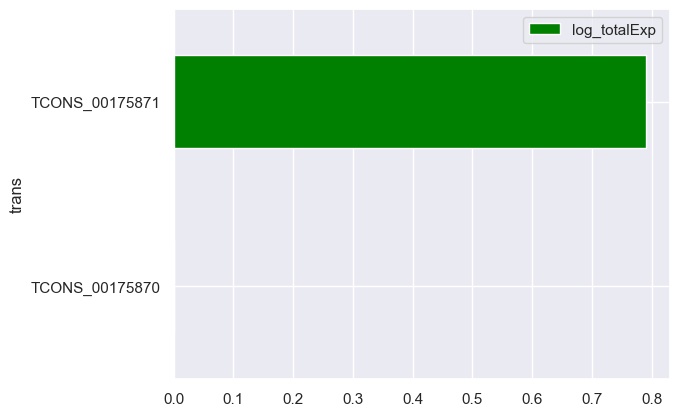

In [209]:
ax2 = by_transcript_totalExp.plot.barh(color="green")

In [210]:
import numpy as np
by_transcript_FC = pd.DataFrame(np.log10( (by_transcript_prob['TPM_1_prob'] + 1) / (by_transcript_prob['TPM_2_prob'] + 1)))
by_transcript_FC.columns = ['logFC']
by_transcript_FC = by_transcript_FC.reset_index()
by_transcript_FC['logFC'] = by_transcript_FC['logFC'].fillna(0)
by_transcript_FC.head(6)

,trans,logFC
0,TCONS_00175870,0.000000
1,TCONS_00175871,-1.065131


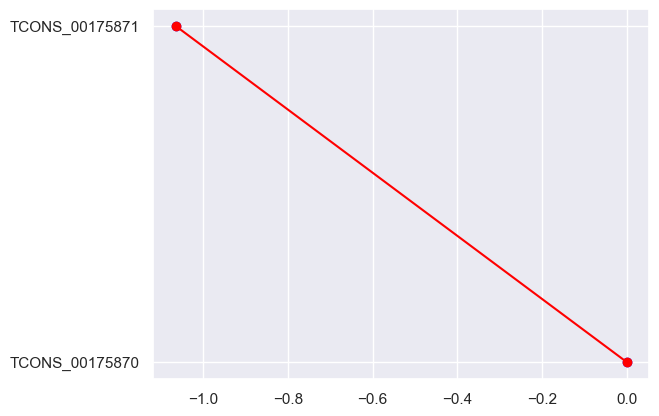

In [211]:
# Plotting
plt.scatter(by_transcript_FC['logFC'], by_transcript_FC['trans'], label='Data points', color='blue')
plt.plot(by_transcript_FC['logFC'], by_transcript_FC['trans'], label='Connected line', color='red', linestyle='-', marker='o')

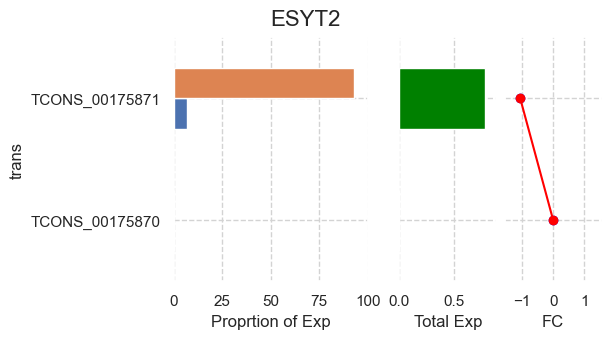

In [212]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a gridspec with one row and three columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(6, 3), frameon=False, constrained_layout=True, gridspec_kw={'width_ratios': [2, 1, 1]})

# Plot data on each subplot
by_transcript_prob.plot.barh(ax=ax1)
by_transcript_totalExp.plot.barh(ax=ax2, color = "green")

ax3.scatter(by_transcript_FC['logFC'], by_transcript_FC['trans'], label='Data points', color='blue')
ax3.plot(by_transcript_FC['logFC'], by_transcript_FC['trans'], label='Connected line', color='red', linestyle='-', marker='o')

# Set x-axis limits for each subplotd
ax1.set_xlim(0, 100)
ax2.set_xlim(0, totalMAX)
ax3.set_xlim(-max(abs(by_transcript_FC['logFC']))-0.5, max(abs(by_transcript_FC['logFC']))+0.5)

# Set the background color of each subplot to white
ax1.set_facecolor('white')
ax2.set_facecolor('white')
ax3.set_facecolor('white')

# Set the background color of the figure to white
fig.set_facecolor('white')

# Set the grid color to light gray
ax1.grid(color='lightgray', linestyle='--')
ax2.grid(color='lightgray', linestyle='--')
ax3.grid(color='lightgray', linestyle='--')

# Add x-axis for each subplot
ax1.set_xlabel('Proprtion of Exp')
ax2.set_xlabel('Total Exp')
ax3.set_xlabel('FC')
ax3.set_ylabel('Transcripts')

fig.suptitle(gene_to_plt, fontsize=16, y=1.08)

ax1.legend().set_visible(False)
ax2.legend().set_visible(False)
ax3.legend().set_visible(False)


plt.show()


In [213]:
order_trans = by_transcript_totalExp.index.tolist()
order_trans.reverse()
order_trans

['TCONS_00175871', 'TCONS_00175870']

In [214]:
sg.plot_each_transcript(order_trans, browser=True, prefix = 'figures/trans')

Saving transcript path graph for TCONS_00175871 as figures/trans_browser_TCONS_00175871_path.png
Saving transcript path graph for TCONS_00175870 as figures/trans_browser_TCONS_00175870_path.png


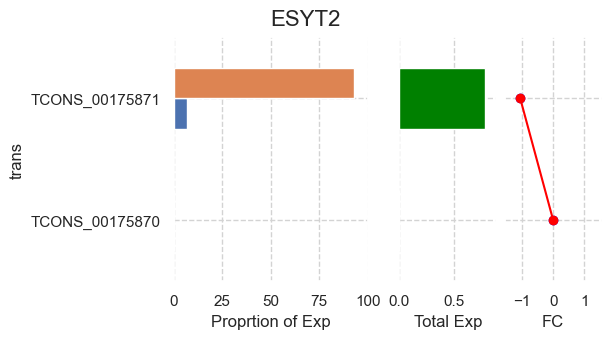

In [215]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a gridspec with one row and three columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(6, 3), frameon=False, constrained_layout=True, gridspec_kw={'width_ratios': [2, 1, 1]})

# Plot data on each subplot
by_transcript_prob.plot.barh(ax=ax1)
by_transcript_totalExp.plot.barh(ax=ax2, color = "green")

ax3.scatter(by_transcript_FC['logFC'], by_transcript_FC['trans'], label='Data points', color='blue')
ax3.plot(by_transcript_FC['logFC'], by_transcript_FC['trans'], label='Connected line', color='red', linestyle='-', marker='o')

# Set x-axis limits for each subplotd
ax1.set_xlim(0, 100)
ax2.set_xlim(0, totalMAX)
ax3.set_xlim(-max(abs(by_transcript_FC['logFC']))-0.5, max(abs(by_transcript_FC['logFC']))+0.5)

# Set the background color of each subplot to white
ax1.set_facecolor('white')
ax2.set_facecolor('white')
ax3.set_facecolor('white')

# Set the background color of the figure to white
fig.set_facecolor('white')

# Set the grid color to light gray
ax1.grid(color='lightgray', linestyle='--')
ax2.grid(color='lightgray', linestyle='--')
ax3.grid(color='lightgray', linestyle='--')

# Add x-axis for each subplot
ax1.set_xlabel('Proprtion of Exp')
ax2.set_xlabel('Total Exp')
ax3.set_xlabel('FC')
ax3.set_ylabel('Transcripts')

fig.suptitle(gene_to_plt, fontsize=16, y=1.08)

ax1.legend().set_visible(False)
ax2.legend().set_visible(False)
ax3.legend().set_visible(False)


plt.show()


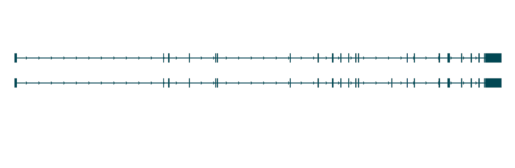

In [216]:
import glob
import matplotlib.pyplot as plt
from PIL import Image as PILImage

# Create a figure and axis
fig, ax = plt.subplots()

# Define the offset for overlapping
offset_x = 0
offset_y = 50
new_width=1000
new_height = 200
# Iterate over each transformation
for i, trans in enumerate(order_trans):
    imageName = glob.glob('figures/*_browser_'+trans+'*.png')[0]
    img = PILImage.open(imageName)
    img = img.resize((new_width, new_height))  # Replace new_width and new_height with your desired dimensions
    
    # Adjust the position of the image based on the offset
    x_offset = i * offset_x
    y_offset = i * offset_y
    ax.imshow(img, alpha=1, extent=[-x_offset, new_width - x_offset, -y_offset, new_height - y_offset])

# Set the limits of the plot
ax.set_xlim(-offset_x * len(order_trans), new_width)
ax.set_ylim(-offset_y * len(order_trans), new_height)

# Turn off axis
ax.axis('off')

# Show the overlapped images
plt.show()
